In [90]:
import json
import pathlib

import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["font.size"] = 16

In [ ]:
project_root = "minami373/lip2sp-base_hubert_2"
run_id_lst = [
    ["dca2gb3d", "5", "1.0", "20241031_233821"],
    ["cdyv6fps", "4", "1.0", "20241031_230230"],
    ["wlxrw27k", "3", "1.0", "20241031_222413"],
    ["5xn74zem", "2", "1.0", "20241031_214046"],
    ["zhoeivjb", "1", "1.0", "20241031_204425"],
    ["sosf0acz", "0", "1.0", "20241031_195052"],
    ["2f694nev", "5", "0.1", "20241028_223025"],
    ["h71pe66b", "4", "0.1", "20241028_214954"],
    ["4h4id4tz", "3", "0.1", "20241028_210910"],
    ["wy0h8bpu", "2", "0.1", "20241028_200713"],
    ["o6hptbk5", "1", "0.1", "20241028_184008"],
    ["285wqmad", "0", "0.1", "20241028_172128"],
    ["1o40lyod", "5", "0.01", "20241028_161118"],
    ["tg4r230f", "4", "0.01", "20241028_154643"],
    ["2zoxvtrk", "4", "0.01", "20241028_150238"],  # f
    ["uw487j74", "3", "0.01", "20241028_141442"],
    ["2njl6ce3", "2", "0.01", "20241028_131108"],
    ["yz0nwsvz", "1", "0.01", "20241028_113232"],
    ["pstdmqnu", "1", "0.01", "20241028_111049"],  # f
    ["ukfz2470", "0", "0.01", "20241028_091345"],
    ["lic1d8lj", "5", "0.001", "20241028_080415"],
    ["pvun1i3f", "4", "0.001", "20241028_070744"],
    ["ceq1xo4e", "3", "0.001", "20241028_061843"],
    ["3jyrz1so", "2", "0.001", "20241028_052606"],
    ["e1xl19lr", "1", "0.001", "20241028_032925"],
    ["kv601pjm", "0", "0.001", "20241028_013251"],
    ["drpgzb7p", "5", "0.0001", "20241028_003600"],
    ["2wwcs7kw", "4", "0.0001", "20241027_233750"],
    ["7091hf62", "3", "0.0001", "20241027_222745"],
    ["ehyszq9v", "2", "0.0001", "20241027_210956"],
    ["48nmuxoh", "1", "0.0001", "20241027_191342"],
    ["q7pgvrou", "0", "0.0001", "20241027_171757"],
]
ckpt_path_lst = [
    "./base_hubert_2/20241027_171757/epoch:45-step:2300.ckpt",
    "./base_hubert_2/20241027_191342/epoch:47-step:2400.ckpt",
    "./base_hubert_2/20241027_210956/epoch:35-step:1800.ckpt",
    "./base_hubert_2/20241027_222745/epoch:49-step:2500.ckpt",
    "./base_hubert_2/20241027_233750/epoch:22-step:1150.ckpt",
    "./base_hubert_2/20241028_003600/epoch:28-step:1450.ckpt",
    "./base_hubert_2/20241028_013251/epoch:47-step:2400.ckpt",
    "./base_hubert_2/20241028_032925/epoch:45-step:2300.ckpt",
    "./base_hubert_2/20241028_052606/epoch:18-step:950.ckpt",
    "./base_hubert_2/20241028_061843/epoch:22-step:1150.ckpt",
    "./base_hubert_2/20241028_070744/epoch:21-step:1100.ckpt",
    "./base_hubert_2/20241028_080415/epoch:45-step:2300.ckpt",
    "./base_hubert_2/20241028_091345/epoch:47-step:2400.ckpt",
    "./base_hubert_2/20241028_111049/epoch:8-step:450.ckpt",
    "./base_hubert_2/20241028_113232/epoch:43-step:2200.ckpt",
    "./base_hubert_2/20241028_131108/epoch:25-step:1300.ckpt",
    "./base_hubert_2/20241028_141442/epoch:21-step:1100.ckpt",
    "./base_hubert_2/20241028_150238/epoch:22-step:1150.ckpt",
    "./base_hubert_2/20241028_154643/epoch:27-step:1400.ckpt",
    "./base_hubert_2/20241028_161118/epoch:45-step:2300.ckpt",
    "./base_hubert_2/20241028_172128/epoch:21-step:1100.ckpt",
    "./base_hubert_2/20241028_184008/epoch:25-step:1300.ckpt",
    "./base_hubert_2/20241028_200713/epoch:24-step:1250.ckpt",
    "./base_hubert_2/20241028_210910/epoch:15-step:800.ckpt",
    "./base_hubert_2/20241028_214954/epoch:10-step:550.ckpt",
    "./base_hubert_2/20241028_223025/epoch:27-step:1400.ckpt",
    "./base_hubert_2/20241028_232525/epoch:7-step:400.ckpt",
    "./base_hubert_2/20241029_001325/epoch:11-step:600.ckpt",
    "./base_hubert_2/20241029_011011/epoch:9-step:500.ckpt",
    "./base_hubert_2/20241029_014934/epoch:16-step:850.ckpt",
    "./base_hubert_2/20241031_195052/epoch:9-step:500.ckpt",
    "./base_hubert_2/20241031_204425/epoch:11-step:600.ckpt",
    "./base_hubert_2/20241031_214046/epoch:12-step:650.ckpt",
    "./base_hubert_2/20241031_222413/epoch:13-step:700.ckpt",
    "./base_hubert_2/20241031_230230/epoch:7-step:400.ckpt",
    "./base_hubert_2/20241031_233821/epoch:15-step:800.ckpt",
]
date_epoch_map = {}
for ckpt_path in ckpt_path_lst:
    ckpt_path = pathlib.Path(ckpt_path)
    date_epoch_map[ckpt_path.parents[0].name] = int(
        ckpt_path.stem.split("-")[0].replace("epoch:", "")
    )

In [ ]:
data_lst = []
for run_id, method_id, loss_weight, date in run_id_lst:
    path_lst = pathlib.Path(f"./wandb_data/{run_id}").glob("**/*.json")
    for path in path_lst:
        loss_name = path.stem.split("_table_")[0]

        if (method_id == "0" or method_id == "1") and loss_name not in [
            "mel_loss",
            "ssl_feature_cluster_loss",
            "total_loss",
        ]:
            continue
        if (method_id == "2" or method_id == "4") and loss_name not in [
            "mel_speech_ssl_loss",
            "ssl_feature_cluster_speech_ssl_loss",
            "total_loss",
        ]:
            continue
        if (method_id == "3" or method_id == "5") and loss_name not in [
            "mel_ensemble_loss",
            "ssl_feature_cluster_ensemble_loss",
            "total_loss",
        ]:
            continue

        if method_id == "2" or method_id == "4":
            if loss_name == "mel_speech_ssl_loss":
                loss_name = "mel_loss"
            elif loss_name == "ssl_feature_cluster_speech_ssl_loss":
                loss_name = "ssl_feature_cluster_loss"
        elif method_id == "3" or method_id == "5":
            if loss_name == "mel_ensemble_loss":
                loss_name = "mel_loss"
            elif loss_name == "ssl_feature_cluster_ensemble_loss":
                loss_name = "ssl_feature_cluster_loss"

        with open(str(path), "r") as f:
            data = json.load(f)["data"]

        for row in data:
            if run_id == "2zoxvtrk":
                row += [
                    "2zoxvtrk",
                    loss_name,
                    method_id,
                    loss_weight,
                    "20241028_154643",
                ]
            elif run_id == "tg4r230f":
                row[0] += 28
                row += ["2zoxvtrk", loss_name, method_id, loss_weight, date]
            elif run_id == "pstdmqnu":
                row += [
                    "pstdmqnu",
                    loss_name,
                    method_id,
                    loss_weight,
                    "20241028_113232",
                ]
            elif run_id == "yz0nwsvz":
                row[0] += 9
                row += ["pstdmqnu", loss_name, method_id, loss_weight, date]
            else:
                row += [run_id, loss_name, method_id, loss_weight, date]
        data_lst += data

df = pl.DataFrame(
    data=data_lst,
    schema=[
        "epoch",
        "loss_type",
        "loss_value",
        "run_id",
        "loss_name",
        "method_id",
        "loss_weight",
        "date",
    ],
    orient="row",
)
df = df.with_columns(
    (pl.col("method_id") + "_" + pl.col("loss_weight")).alias("tag"),
    pl.col("date").replace(date_epoch_map).cast(pl.Int64).alias("selected_epoch"),
).sort(["run_id", "epoch"])
df

epoch,loss_type,loss_value,run_id,loss_name,method_id,loss_weight,date,tag,selected_epoch
i64,str,f64,str,str,str,str,str,str,i64
0,"""train loss""",5.144224,"""1o40lyod""","""ssl_feature_cluster_loss""","""5""","""0.01""","""20241028_161118""","""5_0.01""",45
0,"""train loss""",3.742401,"""1o40lyod""","""mel_loss""","""5""","""0.01""","""20241028_161118""","""5_0.01""",45
0,"""validation loss""",3.602818,"""1o40lyod""","""mel_loss""","""5""","""0.01""","""20241028_161118""","""5_0.01""",45
0,"""validation loss""",4.92448,"""1o40lyod""","""ssl_feature_cluster_loss""","""5""","""0.01""","""20241028_161118""","""5_0.01""",45
0,"""validation loss""",3.652063,"""1o40lyod""","""total_loss""","""5""","""0.01""","""20241028_161118""","""5_0.01""",45
…,…,…,…,…,…,…,…,…,…
21,"""train loss""",1.79847,"""zhoeivjb""","""total_loss""","""1""","""1.0""","""20241031_204425""","""1_1.0""",11
21,"""validation loss""",0.646963,"""zhoeivjb""","""mel_loss""","""1""","""1.0""","""20241031_204425""","""1_1.0""",11
21,"""train loss""",1.032867,"""zhoeivjb""","""ssl_feature_cluster_loss""","""1""","""1.0""","""20241031_204425""","""1_1.0""",11


In [ ]:
df.filter(
    (pl.col("epoch") == pl.col("selected_epoch"))
    & (pl.col("loss_type") == "validation loss")
).select(
    "run_id",
    "method_id",
    "loss_weight",
    "loss_type",
    "loss_name",
    "selected_epoch",
    "loss_value",
).sort(["loss_weight", "method_id", "loss_type", "loss_name"]).pivot(
    on=["loss_name"],
    index=["method_id", "loss_weight", "selected_epoch"],
    values=["loss_value"],
).write_csv("./results/validation_losses.csv")

method_id,loss_weight,selected_epoch,mel_loss,ssl_feature_cluster_loss,total_loss
str,str,i64,f64,f64,f64
"""0""","""0.0001""",45,0.631074,2.134011,0.631287
"""1""","""0.0001""",47,0.63101,2.172032,0.864905
"""2""","""0.0001""",35,0.6311,2.499751,0.63135
"""3""","""0.0001""",49,0.631209,2.546574,0.631463
"""4""","""0.0001""",22,0.632778,2.58491,0.633036
…,…,…,…,…,…
"""1""","""1.0""",11,0.669128,1.771488,2.685946
"""2""","""1.0""",12,0.652194,1.787811,2.440005
"""3""","""1.0""",13,0.643741,1.841802,2.485543


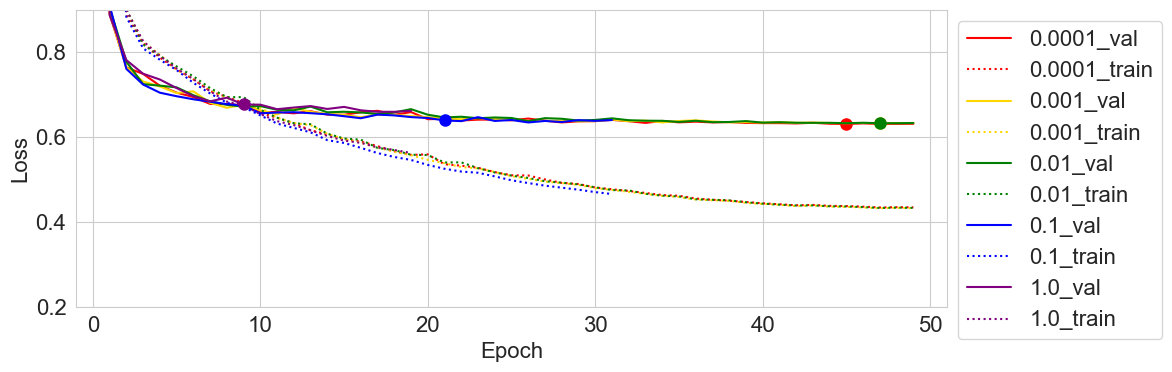

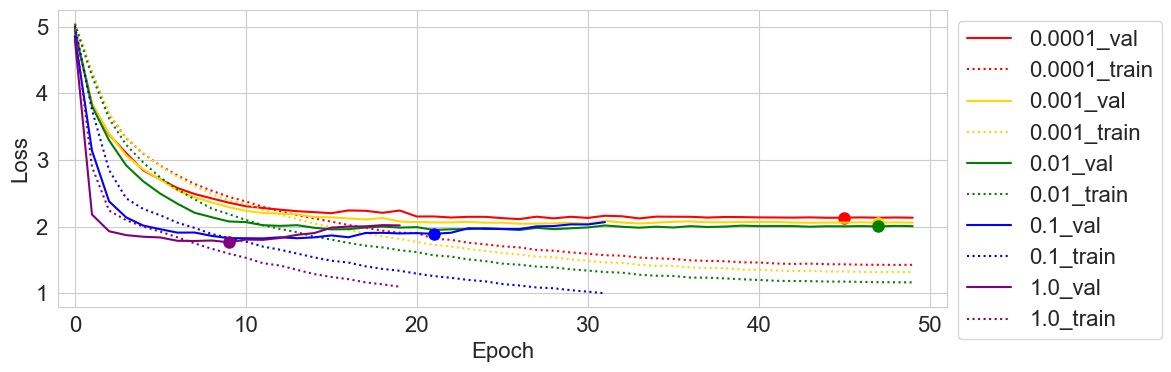

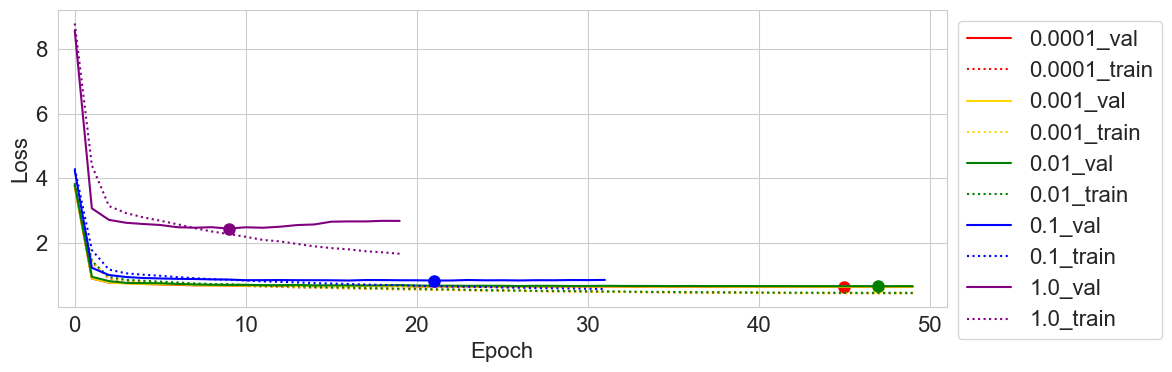

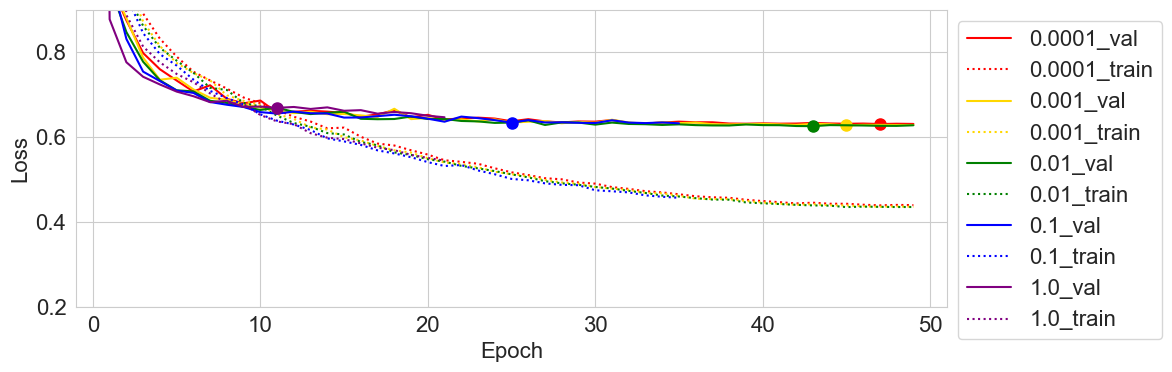

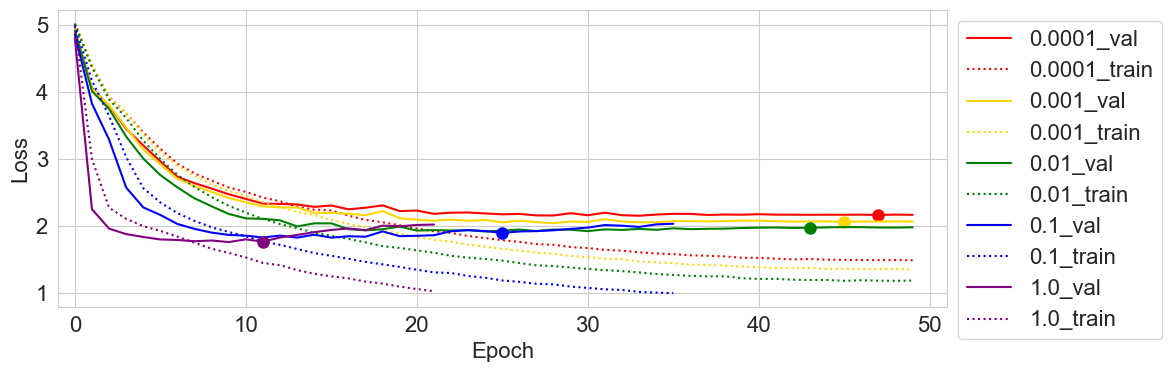

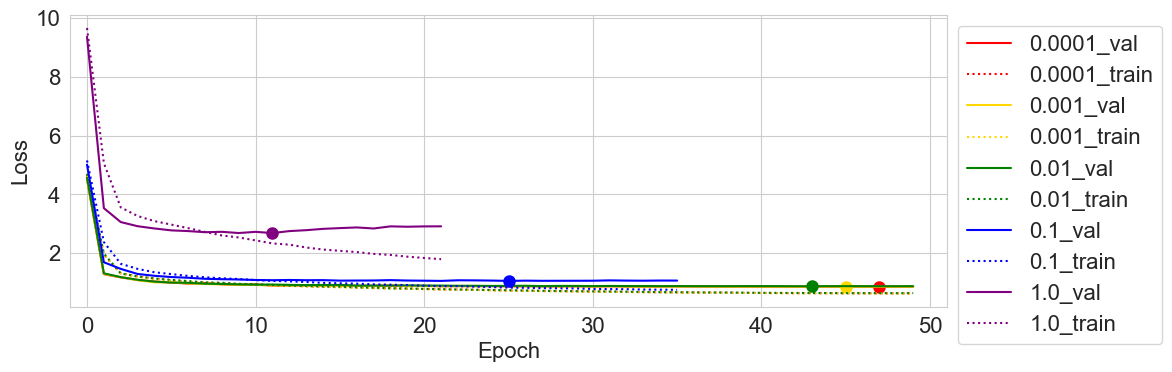

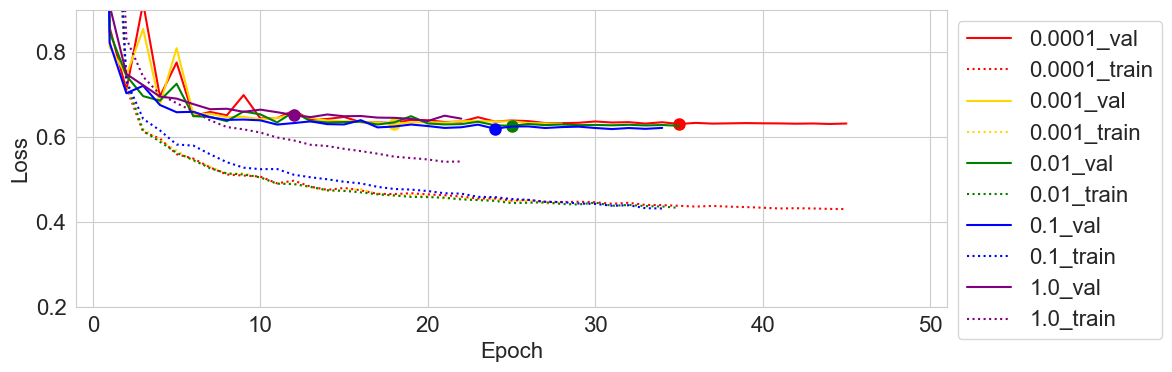

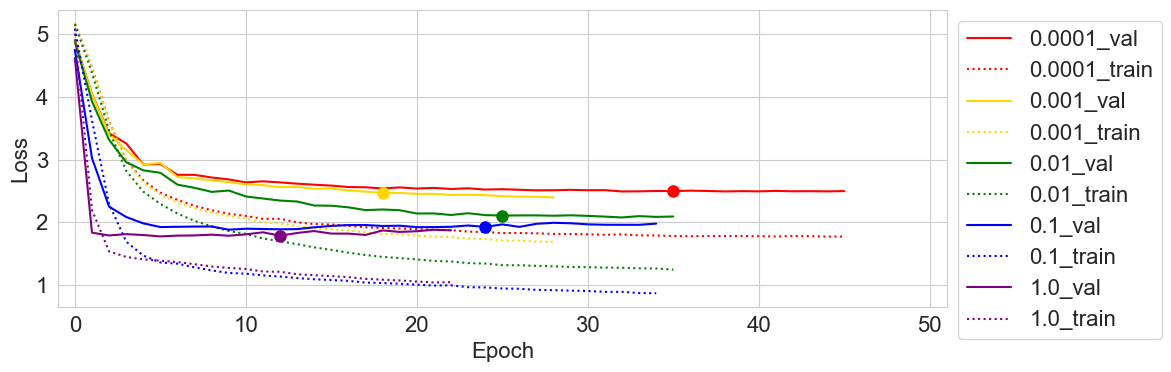

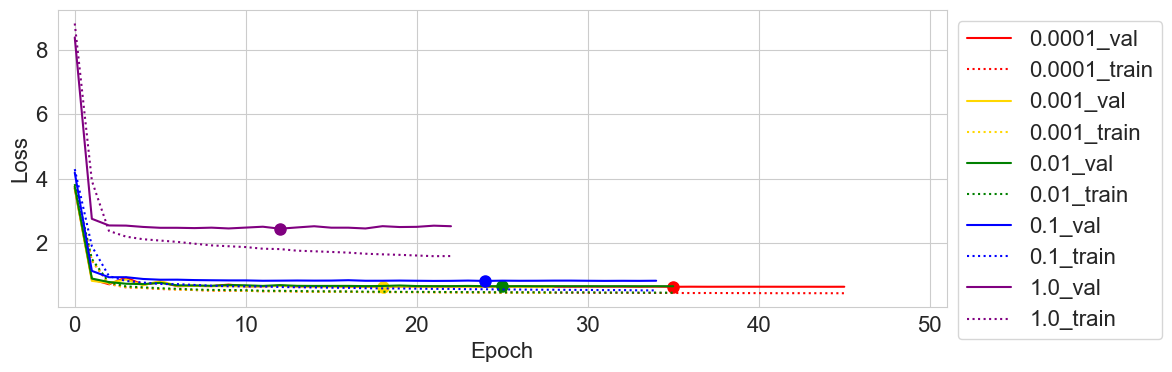

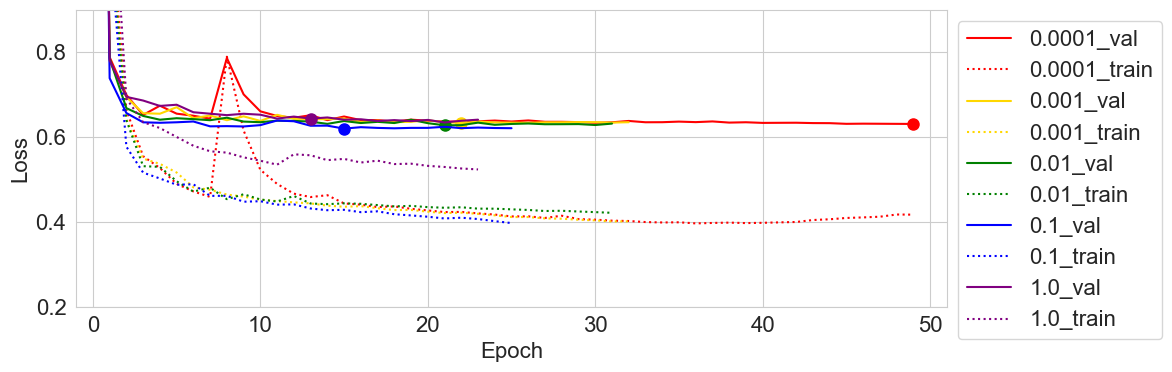

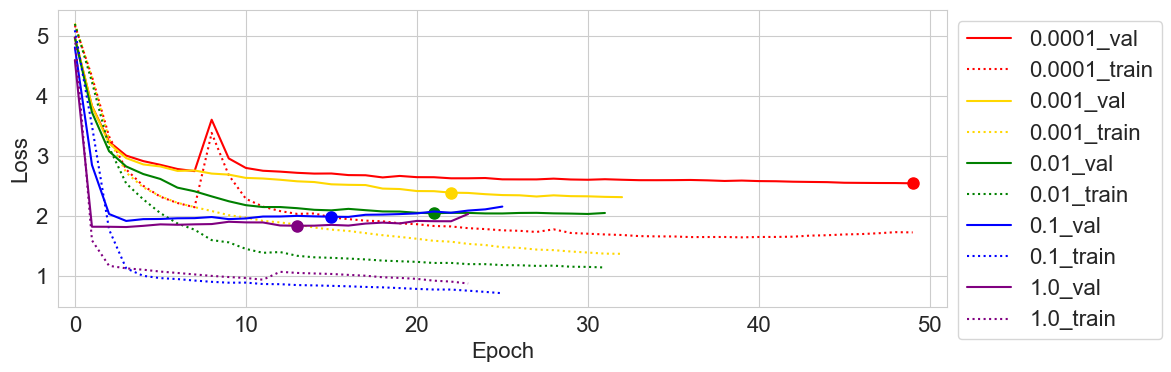

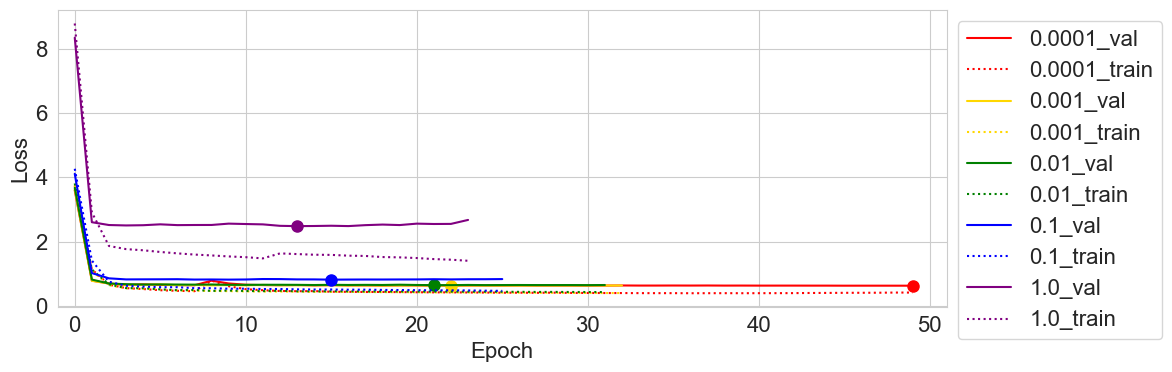

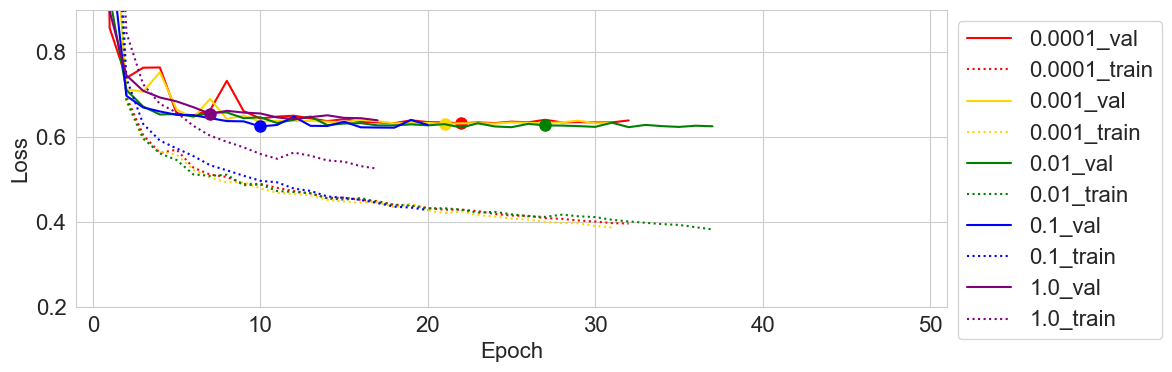

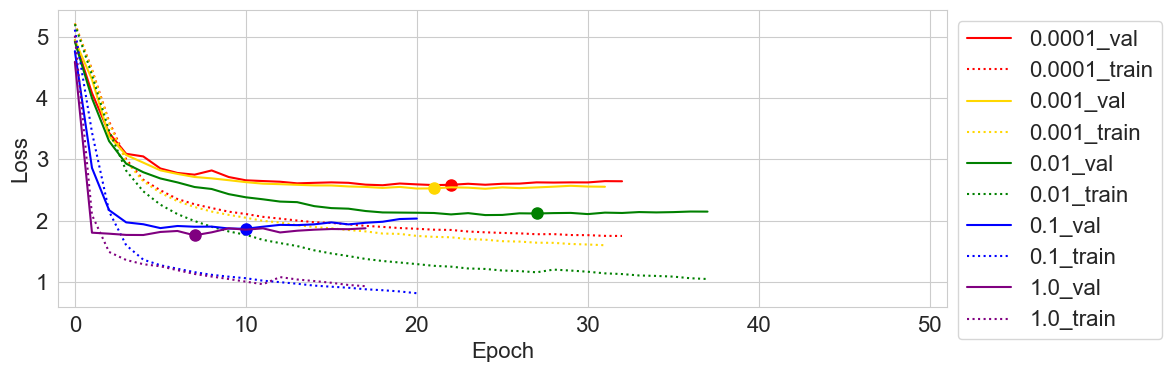

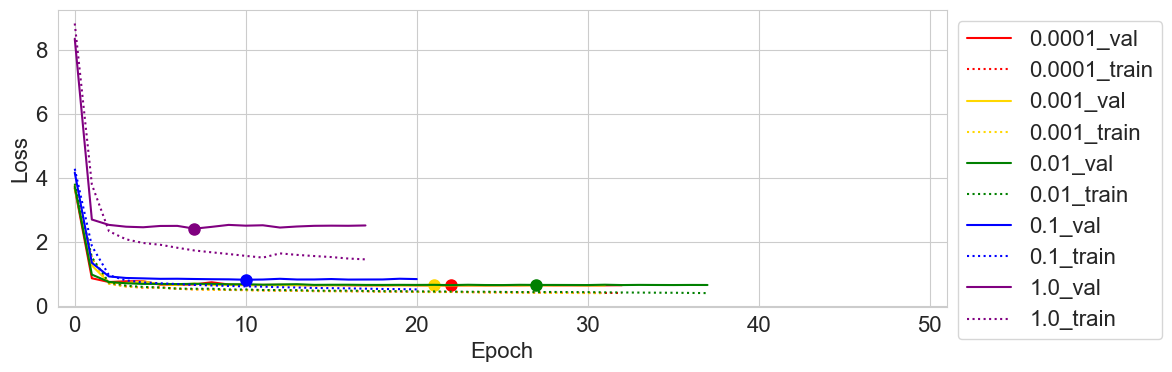

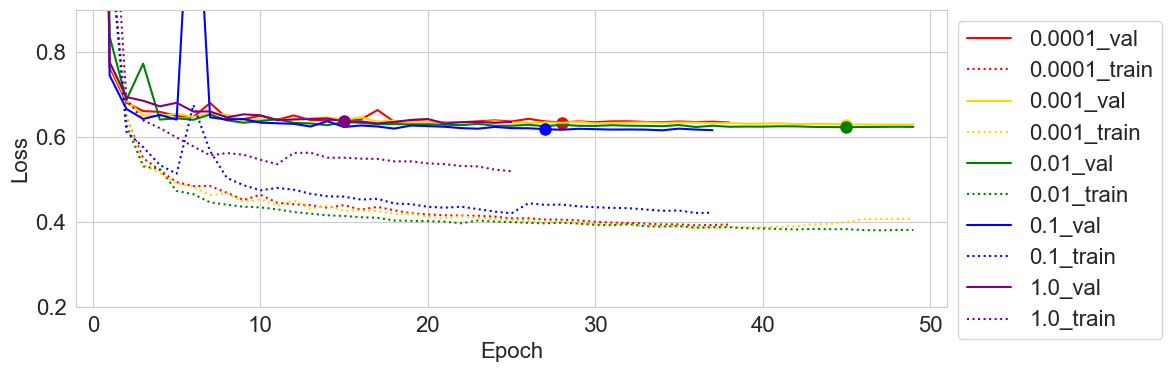

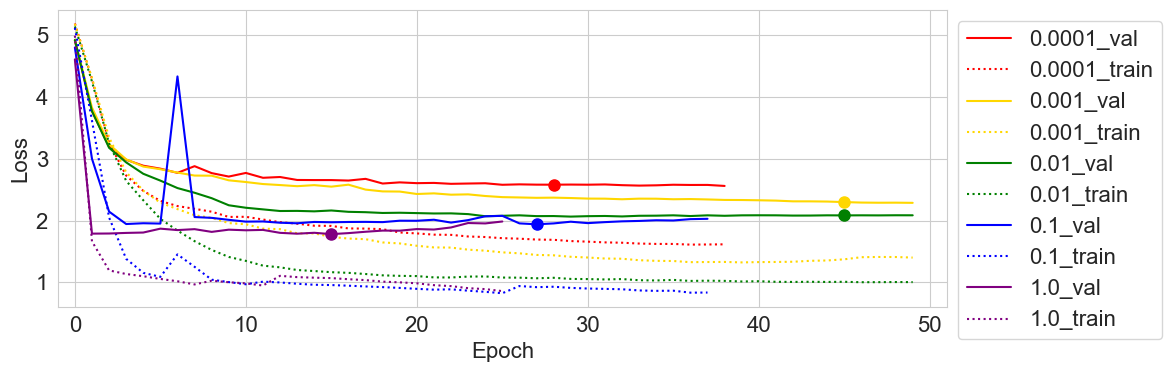

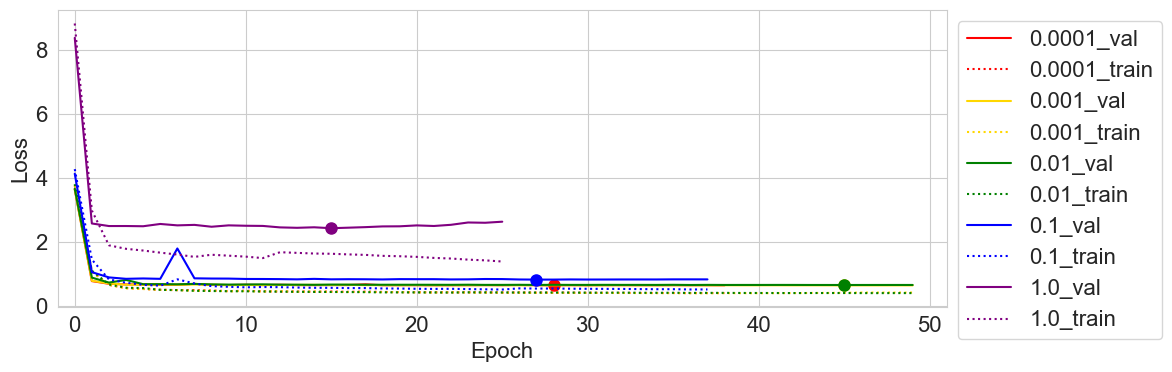

In [94]:
save_dir = pathlib.Path("./figs/impact_of_loss_weights_across_methods")
color_lst = ["red", "gold", "green", "blue", "purple"]
loss_name_lst = ["mel_loss", "ssl_feature_cluster_loss", "total_loss"]

for method_id in sorted(
    list(df.select(pl.col("method_id")).unique().to_numpy().reshape(-1))
):
    save_dir_method = save_dir / str(method_id)
    save_dir_method.mkdir(parents=True, exist_ok=True)

    for loss_name in loss_name_lst:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

        for loss_weight, color in zip(
            sorted(
                list(df.select(pl.col("loss_weight")).unique().to_numpy().reshape(-1))
            ),
            color_lst,
        ):
            data_val = df.filter(
                (pl.col("loss_name") == loss_name)
                & (pl.col("loss_type") == "validation loss")
                & (pl.col("method_id") == str(method_id))
                & (pl.col("loss_weight") == str(loss_weight))
            )
            ax.plot(
                data_val["epoch"],
                data_val["loss_value"],
                label=str(loss_weight) + "_val",
                color=color,
            )

            data_train = df.filter(
                (pl.col("loss_name") == loss_name)
                & (pl.col("loss_type") == "train loss")
                & (pl.col("method_id") == str(method_id))
                & (pl.col("loss_weight") == str(loss_weight))
            )
            ax.plot(
                data_train["epoch"],
                data_train["loss_value"],
                label=str(loss_weight) + "_train",
                color=color,
                linestyle="dotted",
            )

            min_val_loss = df.filter(
                (pl.col("loss_name") == loss_name)
                & (pl.col("loss_type") == "validation loss")
                & (pl.col("method_id") == str(method_id))
                & (pl.col("loss_weight") == str(loss_weight))
                & (pl.col("epoch") == pl.col("selected_epoch"))
            )
            ax.plot(
                min_val_loss["epoch"],
                min_val_loss["loss_value"],
                marker="o",
                color=color,
                markersize=8,
            )

            ax.set_xlabel("Epoch")
            ax.set_ylabel("Loss")
            ax.set_xlim(-1, 51)
            if loss_name == "mel_loss":
                ax.set_ylim(0.2, 0.9)

        plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
        fig.tight_layout()

        save_path = save_dir / method_id / f"{loss_name}.png"
        save_path.parents[0].mkdir(exist_ok=True, parents=True)
        fig.savefig(str(save_path))